# Version Check

In [1]:
import sys
import numpy
import matplotlib
import pandas
import sklearn

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(numpy.__version__))

Python: 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
Numpy: 1.18.5
pandas: 1.0.5
sklearn: 0.23.1
Matplotlib: 1.18.5


# Import Libraries

In [2]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import  cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd


# Data Source

In [3]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

In [4]:
df=pd.read_csv(url)
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [5]:
column=['id','clump_thickness','uniform_cell_size','uniform_cell_shape',
        'marginal_adhesion', 'single_epithelial_size','bare_nuclei',
       'bland_chromatin','normal_nucleoli','mitoses','class']

In [6]:
df1=pd.read_csv(url,names=column)
df1.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Pre-processing

In [7]:
df1.replace('?',-99999, inplace = True)
print(df1.axes)
df1.shape

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


(699, 11)

In [8]:
df1.drop(['id'],1, inplace= True)

In [9]:
print(df1.describe())

       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min             1.000000                1.000000         1.000000   
25%             1.000000                2.000000         2.000000   


[]

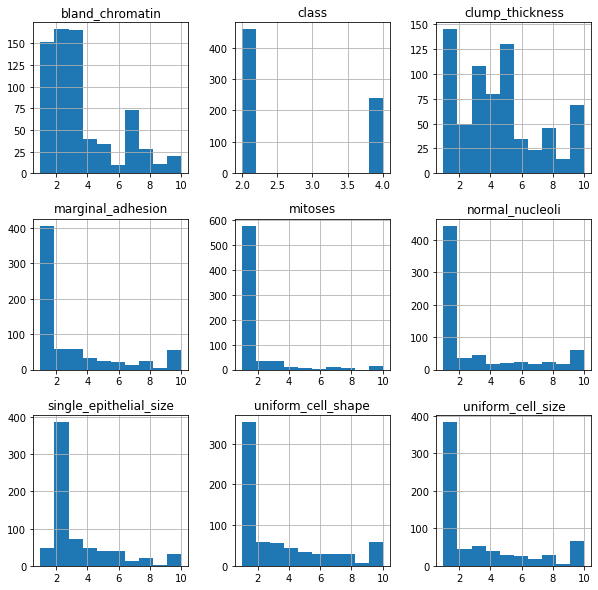

In [10]:
df1.hist(figsize=[10,10])
plt.plot()

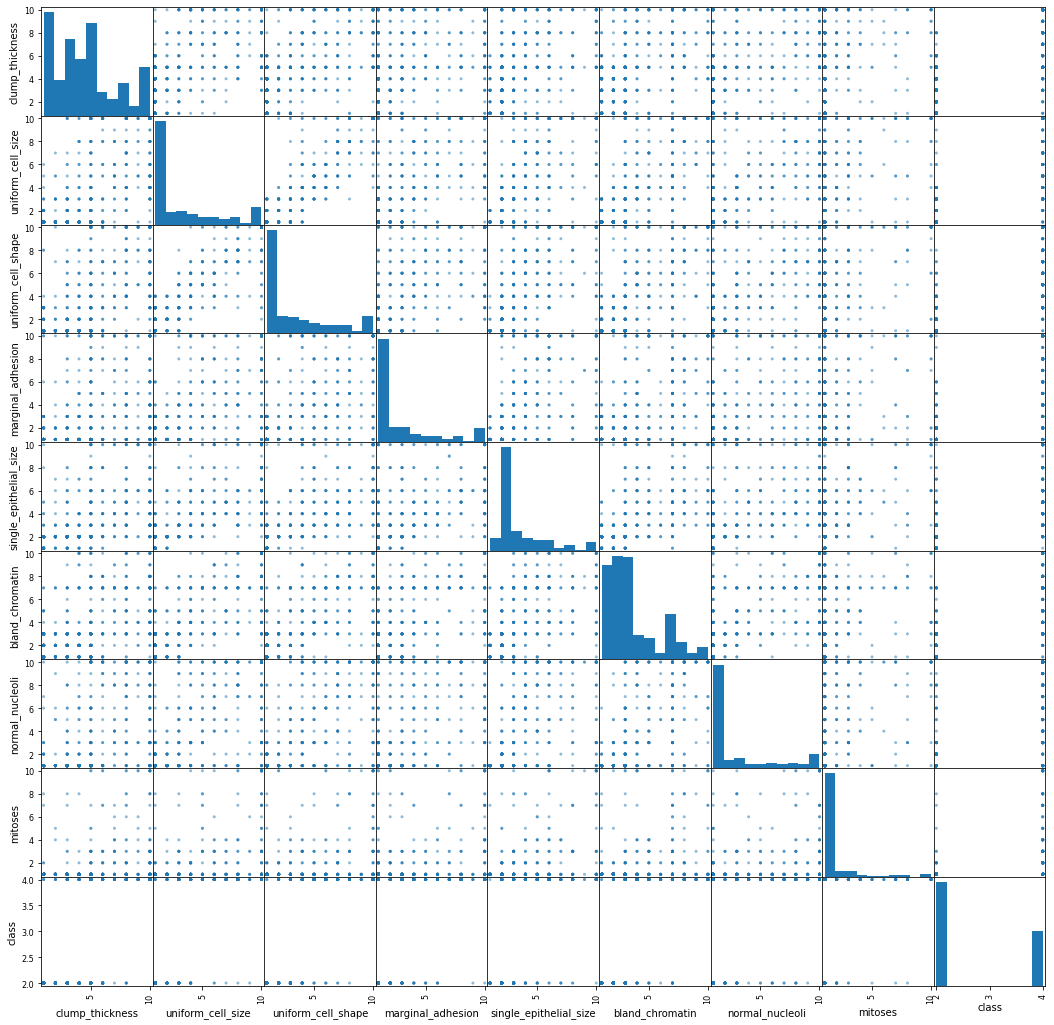

In [11]:
scatter_matrix(df1,figsize=(18,18))
plt.show()

In [12]:
df1.dtypes
df1['bare_nuclei']=pd.to_numeric(df1['bare_nuclei'],downcast='integer')

In [13]:
df1.dtypes

clump_thickness           int64
uniform_cell_size         int64
uniform_cell_shape        int64
marginal_adhesion         int64
single_epithelial_size    int64
bare_nuclei               int32
bland_chromatin           int64
normal_nucleoli           int64
mitoses                   int64
class                     int64
dtype: object

In [14]:
X= df1.drop(['class'],axis=1)
y= df1['class']

# Train-Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [16]:
seed=8
scoring = 'accuracy'

# Model

In [17]:
models=[]
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))    
print(models)

[('KNN', KNeighborsClassifier()), ('SVM', SVC())]


In [18]:
import pickle

model1=KNeighborsClassifier(n_neighbors=5)
model1.fit(X_train, y_train)
pickle.dump(model1, open('model1.pkl','wb'))
#model1 = pickle.load(open('model1.pkl','rb'))

In [19]:
predictions=model1.predict(X_test)
print(accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions))

0.9642857142857143
              precision    recall  f1-score   support

           2       0.98      0.97      0.97        89
           4       0.94      0.96      0.95        51

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



In [23]:
model = pickle.load(open('model1.pkl','rb'))
output = model.predict([[4, 1, 1, 3, 2, 1, 3, 1, 1]])
print(output[0])

2
